In [ ]:
from nltk.corpus import cess_esp
import re
from nltk.tokenize import regexp_tokenize
from nltk import FreqDist
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import math
from tabulate import tabulate
import random
import numpy as np

## Cargamos los datos

In [6]:
df = pd.read_csv("./data/tango_lyrics.csv")

## Inspeccion y limpieza

In [7]:

print("Forma del dataset: ", df.shape)
print("Columnas: ", df.columns)

df.head()

Forma del dataset:  (3996, 3)
Columnas:  Index(['title', 'author', 'lyric'], dtype='object')


,title,author,lyric
0,A bailar,Homero Expósito,"¡A bailar, a bailar que la orquesta se va! Sob..."
1,A bailar el tango,Leopoldo Díaz Vélez,Este tango nació para bailarse y así hamacarse...
2,A cara limpia,Nolo López,No te demores que se hace tarde ponete pronto ...
3,A cara o cruz,"Agustín Irusta, Cátulo Castillo","A cara o cruz le dije un día y a cara cruz, ju..."
4,A Cátulo Castillo,Eladia Blázquez,Tu muerte fue una tarde muy cálida de Octubre;...


In [8]:
# Mostrar cantidad de nulos por columna
print("Valores nulos:")
print(df.isnull().sum())

Valores nulos:
title     0
author    2
lyric     2
dtype: int64


In [9]:
# Eliminamos filas con valores de letra nulos
df = df.dropna(subset=['lyric'])
print("Forma del dataset: ", df.shape)

Forma del dataset:  (3994, 3)


In [10]:
# Cargamos las stopwords
with open('es-stopwords.txt', encoding='utf-8') as f:
    stop_words = set([line.strip() for line in f if line.strip()])

In [11]:
def clean_text(text): 
  text = text.lower()
  # Eliminamos todo caracter que no sea una letra o espacio
  text = re.sub(r'[^a-záéíóúñü\s]', '', text)

  # Dividimos el texto en palabras (tokens) detectando cada palabra con esa expresion regular
  tokens = regexp_tokenize(text, r'\b\w+\b')
  cleaned_tokens = []
  for t in tokens: 
    if t not in stop_words and len(t) > 2: 
      cleaned_tokens.append(t)
  return cleaned_tokens

In [12]:
df["tokens"] = df["lyric"].apply(clean_text)
df.head()

,title,author,lyric,tokens
0,A bailar,Homero Expósito,"¡A bailar, a bailar que la orquesta se va! Sob...","[bailar, bailar, orquesta, fino, garabato, tan..."
1,A bailar el tango,Leopoldo Díaz Vélez,Este tango nació para bailarse y así hamacarse...,"[tango, nació, bailarse, hamacarse, suavemente..."
2,A cara limpia,Nolo López,No te demores que se hace tarde ponete pronto ...,"[demores, tarde, ponete, pronto, disfraz, quie..."
3,A cara o cruz,"Agustín Irusta, Cátulo Castillo","A cara o cruz le dije un día y a cara cruz, ju...","[cara, cruz, dije, día, cara, cruz, jugué, luz..."
4,A Cátulo Castillo,Eladia Blázquez,Tu muerte fue una tarde muy cálida de Octubre;...,"[muerte, tarde, cálida, octubre, acaso, presen..."


In [13]:

# Pasamos todos los tokens a una lista plana para poder contar su frecuencia
all_tokens = []

for token_list in df["tokens"]: 
  for token in token_list: 
    all_tokens.append(token)

fdist_tango = FreqDist(all_tokens)
fdist_tango.most_common(10)

[('amor', 4018),
 ('vida', 2739),
 ('corazón', 2649),
 ('vos', 1734),
 ('tango', 1719),
 ('noche', 1401),
 ('alma', 1392),
 ('dolor', 1337),
 ('quiero', 1237),
 ('día', 993)]

In [14]:
def plot_word_cloud(words, filename=None):
  wordcloud = WordCloud(
      width=800,
      height=600,
      max_words=500,
      scale=3,
    )

  wordcloud.generate_from_frequencies(dict(words))
  plt.figure(figsize=(15,20))
  plt.imshow(wordcloud)
  plt.axis("off")
    
  if filename is not None:
      plt.savefig(filename, bbox_inches='tight')
    
  plt.show()

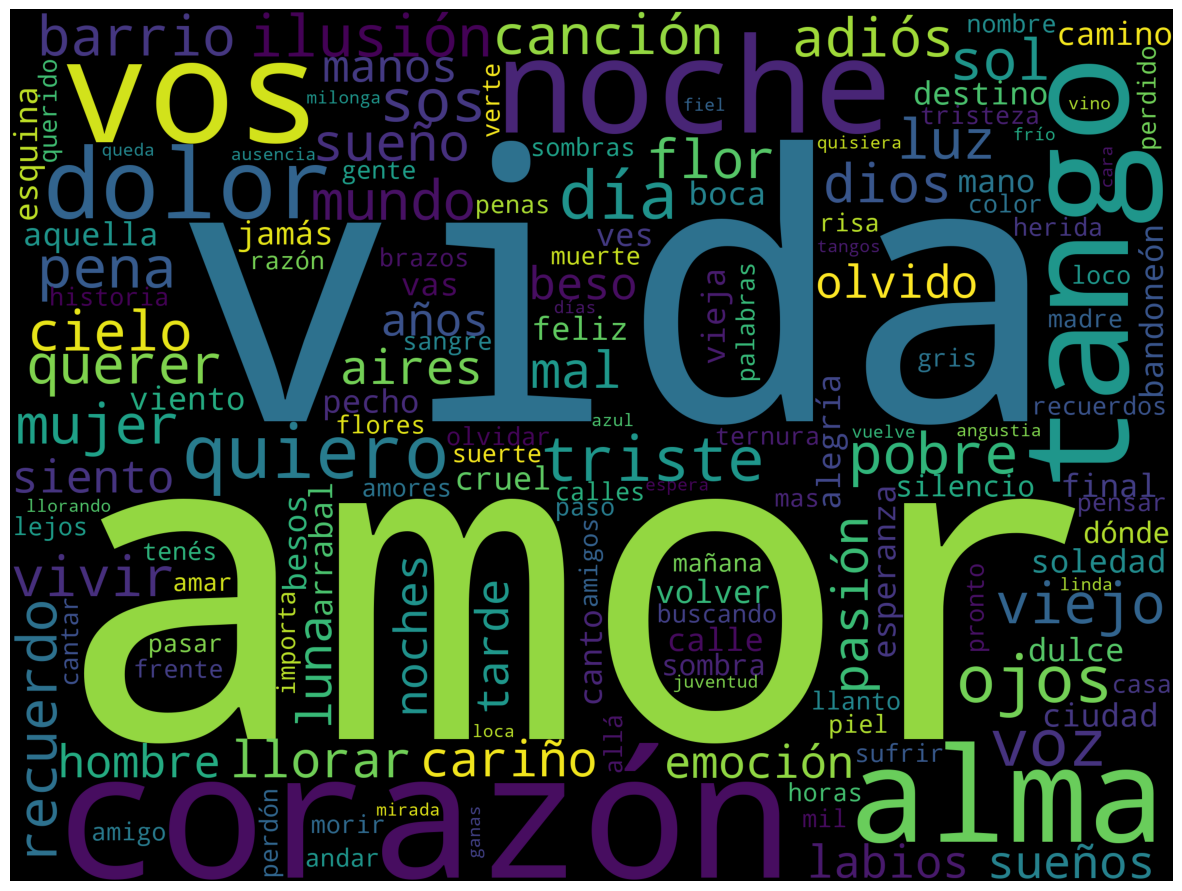

In [15]:
plot_word_cloud(fdist_tango.most_common(150), "resources/tango-wordcloud.png")

In [16]:

# Obtenemos todas las palabras del corpus
cess_tokens = [w.lower() for w in cess_esp.words()]
fdist_cess = FreqDist(cess_tokens)



In [102]:
tanguerometro = {} 

# total de tokens en cada corpus
n_tango = len(fdist_tango)
n_cess = len(fdist_cess)

for word in fdist_tango: 
  freq_tango = fdist_tango[word]
  freq_cess = fdist_cess[word]
  if freq_tango > 0 and freq_cess > 0 and len(word) > 3: 
    p_tango = freq_tango / n_tango
    p_cess = freq_cess / n_cess

    tanguerometro[word] = math.log(p_tango / p_cess)



In [103]:
tanguerometro = sorted(tanguerometro.items(), key=lambda x: x[1], reverse=True)


In [120]:
def show_tanguerometro(tanguerometro, n=10, top = True): 
  # Ordenamos los items
  items_sort = sorted(tanguerometro,  key = lambda x: x[1], reverse=True)
  
  if top: 
    selec = items_sort[:n].copy()
  else: 
    selec = items_sort[-n:].copy()

  # Armar datos para la tabla
  table = [(items_sort.index((palabra, score)) + 1, palabra, round(score, 3)) 
            for palabra, score in selec]
  
  print(tabulate(table, headers=["Ranking", "Palabra", "Tanguerometro"], tablefmt="github"))

In [121]:
show_tanguerometro(tanguerometro)

|   Ranking | Palabra   |   Tanguerometro |
|-----------|-----------|-----------------|
|         1 | flor      |           6.07  |
|         2 | amor      |           5.594 |
|         3 | canción   |           5.511 |
|         4 | tristeza  |           5.449 |
|         5 | llanto    |           5.332 |
|         6 | herida    |           5.285 |
|         7 | llorar    |           5.266 |
|         8 | aires     |           5.195 |
|         9 | ternura   |           5.187 |
|        10 | luna      |           5.181 |


In [122]:
show_tanguerometro(tanguerometro, top = False)

|   Ranking | Palabra    |   Tanguerometro |
|-----------|------------|-----------------|
|      7740 | millones   |          -4.193 |
|      7741 | jugadores  |          -4.314 |
|      7742 | desarrollo |          -4.332 |
|      7743 | proceso    |          -4.417 |
|      7744 | partidos   |          -4.526 |
|      7745 | elecciones |          -4.569 |
|      7746 | equipo     |          -4.59  |
|      7747 | presidente |          -4.615 |
|      7748 | dólares    |          -4.86  |
|      7749 | ministro   |          -4.931 |


<Figure size 1000x600 with 0 Axes>

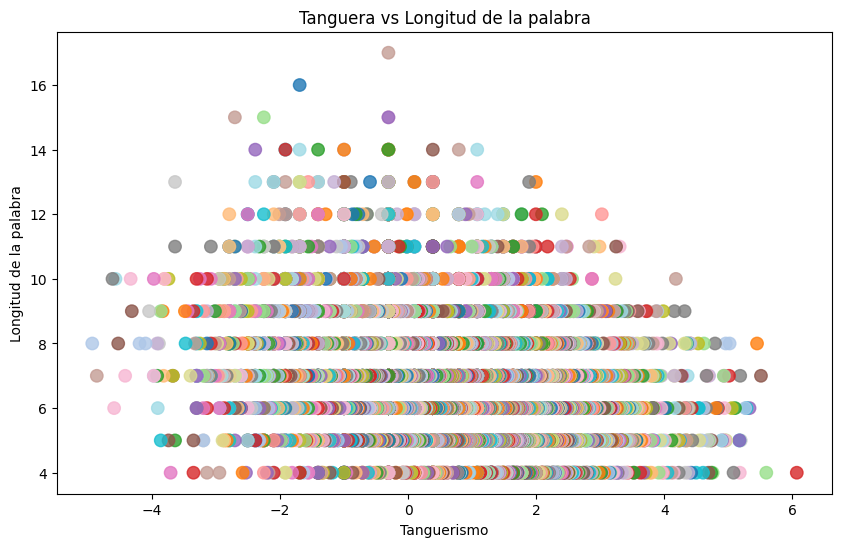

In [112]:
plt.figure(figsize=(10,6))


n = len(tanguerometro)
x = [score for _, score in tanguerometro]       # tanguerometro
y = [len(word) for word, _ in tanguerometro]    # length
colors = np.random.rand(n)                 # 

plt.figure(figsize=(10,6))
plt.scatter(x, y, c=colors, s=80, alpha=0.8, cmap="tab20")
plt.xlabel("Tanguerismo")
plt.ylabel("Longitud de la palabra")
plt.title("Tanguera vs Longitud de la palabra")
plt.show()